# Spojení dat povodí a hypso

## Povodí:

In [2]:
# -*- coding: utf-8 -*-
from __future__ import unicode_literals

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# nastaveni promennych pro grafy
%matplotlib inline
plt.rcParams['figure.figsize'] = (6,4)

# font = {'family' : 'sans-serif',
#         'weight' : 'normal',
#         'size'   : 11}

# plt.rc('font', **font)

SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size = SMALL_SIZE)
plt.rc('axes', titlesize = BIGGER_SIZE)


In [5]:
# nacti csv soubory (vystupy funkce 2_povodi.py)
p = pd.read_csv(r"C:\fenclova\diplomka\analyza\vysledky\2_pocet_povodi1991.csv").set_index("ID")
p = p[["pocet_povodi", "pocet_povodi_vse", "rozvodnice_delka"]]

p.head()

,pocet_povodi,pocet_povodi_vse,rozvodnice_delka
ID,,,
46,8,12,39290.0
58,17,22,57545.0
92,12,15,48840.0
96,14,26,48875.0
104,5,6,30940.0


In [6]:
p.describe()

,pocet_povodi,pocet_povodi_vse,rozvodnice_delka
count,1965.000000,1965.000000,1965.000000
mean,12.074300,24.587786,47764.562341
std,4.135507,15.145326,9481.774462
min,2.000000,4.000000,19445.000000
25%,9.000000,15.000000,41585.000000
50%,12.000000,21.000000,47565.000000
75%,15.000000,30.000000,54035.000000
max,29.000000,173.000000,81710.000000


Text(0.5,1,u'Rozlo\u017een\xed po\u010dtu povod\xed')

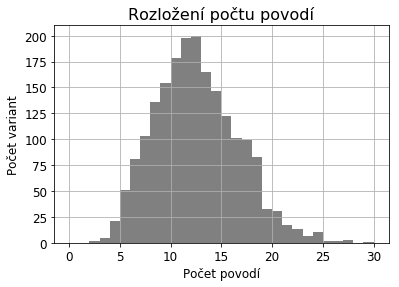

In [7]:
# histogram počtu povodí
d = p.pocet_povodi
plt.figure()

dx = d.hist(bins=30, range=[0, 30], facecolor='grey', align='mid'
           )
dx.set_xlabel('Počet povodí')
dx.set_ylabel('Počet variant')
dx.set_title("Rozložení počtu povodí")

Text(0.5,1,u'Z\xe1vislost po\u010dtu povod\xed p\u0159ed a po v\xfdb\u011bru')

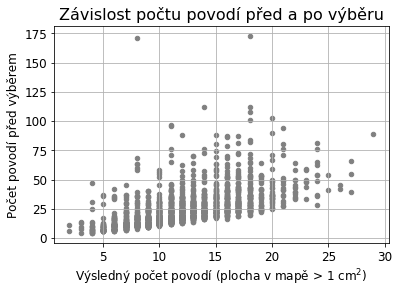

In [8]:
# graf závislosti počtu výsledných povodí na všech (i těch vyřazených < 1 cm2)
a = p
ax = a.plot(x='pocet_povodi', y='pocet_povodi_vse', kind='scatter',
            color='grey',
            #ylim={0, 100}, xlim={0,30}, 
            grid=True)

ax.set_xlabel('Výsledný počet povodí (plocha v mapě > 1 cm$^2$)')
ax.set_ylabel('Počet povodí před výběrem')
ax.set_title("Závislost počtu povodí před a po výběru")

In [9]:
# pokus: přípustné varianty, točí se kolem ideální varianty
p[(p.pocet_povodi >= 9) & (p.pocet_povodi >= 15)].describe()

,pocet_povodi,pocet_povodi_vse,rozvodnice_delka
count,524.000000,524.000000,524.000000
mean,17.416031,36.988550,58822.967557
std,2.420951,16.988801,5948.888019
min,15.000000,16.000000,46970.000000
25%,16.000000,26.000000,54662.500000
50%,17.000000,33.000000,58120.000000
75%,18.000000,43.000000,62108.750000
max,29.000000,173.000000,81710.000000


## Hypso:

In [10]:
# vysledek analýzy hypsometrie
hypso = pd.read_csv(r"C:\fenclova\diplomka\analyza\vysledky\analyza_1_hypsometrie.csv").set_index("ID")
hypso.head()

,vhodny_ziv,sum16,pocet_hypso_vrstevnic
ID,,,
46,5,68.0,20.0
58,5,122.0,31.0
92,10,117.0,37.0
96,5,142.0,26.0
104,5,88.0,26.0


In [11]:
hypso.describe()

,vhodny_ziv,sum16,pocet_hypso_vrstevnic
count,1965.000000,1965.000000,1965.000000
mean,14765.508906,14850.313486,14783.320611
std,35474.183589,35438.899656,35466.771101
min,5.000000,23.000000,5.000000
25%,5.000000,90.000000,24.000000
50%,10.000000,114.000000,31.000000
75%,10.000000,150.000000,41.000000
max,99999.000000,99999.000000,99999.000000


In [12]:
hypso = hypso[hypso.sum16 < 99999]
hypso.describe()

,vhodny_ziv,sum16,pocet_hypso_vrstevnic
count,1675.000000,1675.000000,1675.000000
mean,8.665672,108.152836,29.561194
std,4.700897,31.593037,9.164515
min,5.000000,23.000000,5.000000
25%,5.000000,86.000000,23.000000
50%,10.000000,106.000000,29.000000
75%,10.000000,132.000000,36.000000
max,20.000000,177.000000,67.000000


## Generalizace:

In [13]:
gen = pd.read_csv(r"C:\fenclova\diplomka\analyza\vysledky\0_predvyber_vice1991.csv").set_index("ID")
gen = gen.drop(columns = "dibA02_delkaCelkova")
gen.head()

,zeleznice_delka,silnice_delka,dalnice_delka,vrstevnice_delka,rozvodniceIII_delka,rozvodniceII_delka,rozvodniceI_delka,vodni_plohy_rozloha,vodni_nadrz_rozloha,relief_rozloha,zastavba_rozloha
ID,,,,,,,,,,,
46,9420.07,3718.49,0.0,69482.14,5335.89,0.00,0.0,70898.06,15691.15,35218.35,623982.39
58,4298.16,10871.99,0.0,194124.27,5120.48,0.00,0.0,228440.24,228440.24,0.00,426467.58
92,5978.21,3822.84,0.0,281848.79,1663.42,3326.84,0.0,107000.92,315.71,27.98,218191.39
96,4186.07,15454.99,0.0,204241.92,1353.41,0.00,0.0,242562.12,178661.68,7536.45,1345205.44
104,5089.88,12431.33,0.0,93755.60,1877.34,3754.69,0.0,342418.00,176302.07,0.00,777753.06


## Spojení hypso & povodí & dalších kritérií

In [14]:
# radovost rek
radovost = pd.read_csv(r"C:\fenclova\diplomka\analyza\vysledky\analyza_0_radovost_toku4472.csv").set_index("ID")
radovost.head()

,celkova_delka,pocet_radu,radovost_ANO
ID,,,
14,17394.68,3,1
25,18035.44,3,1
38,17475.16,4,1
40,24002.05,5,1
43,9391.67,2,1


In [15]:
radovost = radovost["pocet_radu"]
radovost.head()

ID
14    3
25    3
38    4
40    5
43    2
Name: pocet_radu, dtype: int64

In [16]:
# podil plochy po deleni hlavnim vodnim tokem
reka_podil = pd.read_csv(r"C:\fenclova\diplomka\analyza\vysledky\analyza_0_predvyber_vodni_tok1991.csv").set_index("ID")
reka_podil = reka_podil[["nejlepsi_podil_ploch", "pocet_pruseciku"]]
reka_podil.head()

,nejlepsi_podil_ploch,pocet_pruseciku
ID,,
46,2.91,19
58,1.06,16
92,1.13,19
96,1.33,16
104,1.39,17


In [17]:
# doplněk zástavba povrchová...
povrch = pd.read_csv(r"C:\fenclova\diplomka\analyza\vysledky\0_predvyber_doplnek_zastavba_povrch.csv").set_index("ID")
povrch.head()

,zastavba_povrch_rozloha
ID,
46,0.0
58,0.0
92,0.0
96,0.0
104,0.0


In [18]:
# doplněk délka dibavod...
dibA02 = pd.read_csv(r"C:\fenclova\diplomka\analyza\vysledky\2_delka_dibavod.csv").set_index("ID")
dibA02.head()

,dibA02_delka,dibA02_vyber_delka
ID,,
46,14904.32,13742.95
58,31317.35,21531.15
92,28727.47,23265.21
96,33238.93,18507.99
104,11536.20,8177.55


In [19]:
# spočti rozdíl mezi délkou dibavod v území a délkou dibavod ze které bylo počítáno povodí
dibA02["dibA02_rozdil"] = dibA02.dibA02_delka - dibA02.dibA02_vyber_delka
dibA02.describe()

,dibA02_delka,dibA02_vyber_delka,dibA02_rozdil
count,1991.000000,1991.00000,1991.000000
mean,24714.909663,18654.05109,6060.858574
std,8881.583952,7055.68700,4077.674411
min,6747.830000,4332.41000,0.000000
25%,18820.840000,13944.98500,3141.135000
50%,23853.980000,17758.65000,5315.000000
75%,29159.510000,22130.30500,8306.395000
max,82510.330000,62914.88000,35751.960000


Text(0.5,1,u'D\xe9lka vodn\xedch tok\u016f')

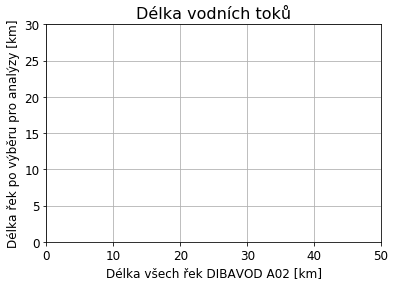

In [20]:
# graf závislosti délky dibavod před a po výběru
a = dibA02
#a['dibA02_delka'] = a['dibA02_delka'].apply(lambda x: x/1000)
#a['dibA02_vyber_delka'] = a['dibA02_vyber_delka'].apply(lambda x: x/1000)
ax = a.plot(x='dibA02_delka', y='dibA02_vyber_delka', kind='scatter',
            color='grey',
            ylim={0, 30}, xlim={0,50}, 
            grid=True)

ax.set_xlabel('Délka všech řek DIBAVOD A02 [km]')
ax.set_ylabel('Délka řek po výběru pro analýzy [km]')
ax.set_title("Délka vodních toků")

Text(0.5,1,u'Rozd\xedl v d\xe9lce DIBADOV p\u0159ed a po selekci')

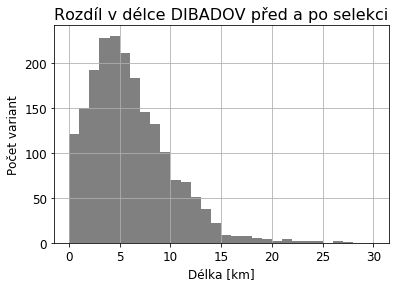

In [21]:
# histogram rozdílu v délce dibavod
d = dibA02.dibA02_rozdil
plt.figure()

dx = (d/1000).hist(bins=30, range=[0, 30], facecolor='grey', align='mid'
           )
dx.set_xlabel('Délka [km]')
dx.set_ylabel('Počet variant')
dx.set_title("Rozdíl v délce DIBADOV před a po selekci")

In [22]:
pred = reka_podil.join(radovost)
pred.describe()

,nejlepsi_podil_ploch,pocet_pruseciku,pocet_radu
count,1991.000000,1991.000000,1991.000000
mean,1.646469,18.470618,3.343044
std,0.557799,4.006780,0.810329
min,1.000000,12.000000,2.000000
25%,1.160000,15.000000,3.000000
50%,1.480000,18.000000,3.000000
75%,2.040000,21.000000,4.000000
max,3.000000,39.000000,5.000000


In [41]:
# vse napojim na hypso = 1675 zaznamu
hpg = hypso.join(p).join(gen).join(pred)
hpg.head()

ValueError: columns overlap but no suffix specified: Index([u'pocet_pruseciku', u'nejlepsi_podil_ploch'], dtype='object')

### rozdělení tematicky na 3 mapy = hodnocení 1965 variant

In [42]:
hpg.head()

,vhodny_ziv,sum16,pocet_hypso_vrstevnic,pocet_povodi,pocet_povodi_vse,rozvodnice_delka,zeleznice_delka,silnice_delka,dalnice_delka,vrstevnice_delka,rozvodniceIII_delka,rozvodniceII_delka,rozvodniceI_delka,vodni_plohy_rozloha,vodni_nadrz_rozloha,relief_rozloha,zastavba_rozloha,nejlepsi_podil_ploch,pocet_pruseciku,pocet_radu
ID,,,,,,,,,,,,,,,,,,,,
46,5,68.0,20.0,8,12,39290.0,9420.07,3718.49,0.0,69482.14,5335.89,0.00,0.0,70898.06,15691.15,35218.35,623982.39,2.91,19,3
58,5,122.0,31.0,17,22,57545.0,4298.16,10871.99,0.0,194124.27,5120.48,0.00,0.0,228440.24,228440.24,0.00,426467.58,1.06,16,3
92,10,117.0,37.0,12,15,48840.0,5978.21,3822.84,0.0,281848.79,1663.42,3326.84,0.0,107000.92,315.71,27.98,218191.39,1.13,19,3
96,5,142.0,26.0,14,26,48875.0,4186.07,15454.99,0.0,204241.92,1353.41,0.00,0.0,242562.12,178661.68,7536.45,1345205.44,1.33,16,4
104,5,88.0,26.0,5,6,30940.0,5089.88,12431.33,0.0,93755.60,1877.34,3754.69,0.0,342418.00,176302.07,0.00,777753.06,1.39,17,2


In [43]:
# generalizace
# TODO: doplnit povrchovou těžbu // chybí vrstevnice 
gen = hpg[["zeleznice_delka", "vodni_plohy_rozloha", "vodni_nadrz_rozloha", "silnice_delka", "dalnice_delka", "zastavba_rozloha"]]
gen = gen.join(povrch)
gen.to_csv(r"C:\fenclova\diplomka\analyza\vysledky\data_generalizace.csv")
gen.head()

,zeleznice_delka,vodni_plohy_rozloha,vodni_nadrz_rozloha,silnice_delka,dalnice_delka,zastavba_rozloha,zastavba_povrch_rozloha
ID,,,,,,,
46,9420.07,70898.06,15691.15,3718.49,0.0,623982.39,0.0
58,4298.16,228440.24,228440.24,10871.99,0.0,426467.58,0.0
92,5978.21,107000.92,315.71,3822.84,0.0,218191.39,0.0
96,4186.07,242562.12,178661.68,15454.99,0.0,1345205.44,0.0
104,5089.88,342418.00,176302.07,12431.33,0.0,777753.06,0.0


In [26]:
gen.describe()

,zeleznice_delka,vodni_plohy_rozloha,vodni_nadrz_rozloha,silnice_delka,dalnice_delka,zastavba_rozloha,zastavba_povrch_rozloha
count,1675.000000,1.675000e+03,1.675000e+03,1675.000000,1675.000000,1.675000e+03,1.675000e+03
mean,5299.142555,2.575654e+05,1.950035e+05,13381.005988,275.612215,9.509187e+05,3.090959e+03
std,1501.294288,4.699260e+05,4.259662e+05,4174.725074,1027.868097,4.435258e+05,3.396735e+04
min,3009.450000,2.981500e+02,0.000000e+00,350.290000,0.000000,2.011160e+05,0.000000e+00
25%,4252.360000,4.158302e+04,1.375585e+04,10604.735000,0.000000,5.984126e+05,0.000000e+00
50%,4915.470000,1.104184e+05,4.675748e+04,13334.990000,0.000000,8.905748e+05,0.000000e+00
75%,6074.675000,2.672476e+05,1.887529e+05,16093.665000,0.000000,1.243179e+06,0.000000e+00
max,9992.520000,5.063953e+06,4.985813e+06,29488.800000,7984.230000,1.998267e+06,1.144796e+06


In [27]:
# hypso data
hypso = hpg[["sum16", "pocet_hypso_vrstevnic", "vrstevnice_delka", "pocet_pruseciku", "nejlepsi_podil_ploch", "relief_rozloha", "vhodny_ziv"]]
hypso.to_csv(r"C:\fenclova\diplomka\analyza\vysledky\data_hypsometrie.csv")
hypso.head()

,sum16,pocet_hypso_vrstevnic,vrstevnice_delka,pocet_pruseciku,nejlepsi_podil_ploch,relief_rozloha,vhodny_ziv
ID,,,,,,,
46,68.0,20.0,69482.14,19,2.91,35218.35,5
58,122.0,31.0,194124.27,16,1.06,0.00,5
92,117.0,37.0,281848.79,19,1.13,27.98,10
96,142.0,26.0,204241.92,16,1.33,7536.45,5
104,88.0,26.0,93755.60,17,1.39,0.00,5


In [28]:
hypso.describe()

,sum16,pocet_hypso_vrstevnic,vrstevnice_delka,pocet_pruseciku,nejlepsi_podil_ploch,relief_rozloha,vhodny_ziv
count,1675.000000,1675.000000,1.675000e+03,1675.000000,1675.00000,1675.000000,1675.000000
mean,108.152836,29.561194,2.647786e+05,18.550448,1.65397,7138.020490,8.665672
std,31.593037,9.164515,1.664495e+05,4.070649,0.55638,13069.780761,4.700897
min,23.000000,5.000000,3.427559e+04,12.000000,1.00000,0.000000,5.000000
25%,86.000000,23.000000,1.422879e+05,15.000000,1.17000,0.000000,5.000000
50%,106.000000,29.000000,2.262111e+05,18.000000,1.50000,164.410000,10.000000
75%,132.000000,36.000000,3.416400e+05,21.000000,2.05000,7760.050000,10.000000
max,177.000000,67.000000,1.074631e+06,39.000000,3.00000,61746.620000,20.000000


In [29]:
# povodí data
povodi = hpg[["pocet_povodi", "pocet_povodi_vse", "pocet_radu", "rozvodnice_delka", "rozvodniceI_delka", "rozvodniceII_delka", "rozvodniceIII_delka", "vodni_plohy_rozloha", "vodni_nadrz_rozloha"]]
povodi = povodi.join(dibA02)
povodi.to_csv(r"C:\fenclova\diplomka\analyza\vysledky\data_povodi.csv")
povodi.head()

,pocet_povodi,pocet_povodi_vse,pocet_radu,rozvodnice_delka,rozvodniceI_delka,rozvodniceII_delka,rozvodniceIII_delka,vodni_plohy_rozloha,vodni_nadrz_rozloha,dibA02_delka,dibA02_vyber_delka,dibA02_rozdil
ID,,,,,,,,,,,,
46,8,12,3,39290.0,0.0,0.00,5335.89,70898.06,15691.15,14904.32,13742.95,1161.37
58,17,22,3,57545.0,0.0,0.00,5120.48,228440.24,228440.24,31317.35,21531.15,9786.20
92,12,15,3,48840.0,0.0,3326.84,1663.42,107000.92,315.71,28727.47,23265.21,5462.26
96,14,26,4,48875.0,0.0,0.00,1353.41,242562.12,178661.68,33238.93,18507.99,14730.94
104,5,6,2,30940.0,0.0,3754.69,1877.34,342418.00,176302.07,11536.20,8177.55,3358.65


In [30]:
povodi.describe()

,pocet_povodi,pocet_povodi_vse,pocet_radu,rozvodnice_delka,rozvodniceI_delka,rozvodniceII_delka,rozvodniceIII_delka,vodni_plohy_rozloha,vodni_nadrz_rozloha,dibA02_delka,dibA02_vyber_delka,dibA02_rozdil
count,1675.000000,1675.000000,1675.000000,1675.000000,1675.000000,1675.000000,1675.000000,1.675000e+03,1.675000e+03,1675.000000,1675.000000,1675.000000
mean,12.196418,24.689552,3.312239,47888.829851,537.948657,2755.149421,3123.684579,2.575654e+05,1.950035e+05,24159.303618,18389.389899,5769.913719
std,4.022664,15.033308,0.796385,9173.090244,2014.249242,3965.584384,2172.547015,4.699260e+05,4.259662e+05,8253.538430,6582.040872,3660.904627
min,2.000000,4.000000,2.000000,19445.000000,0.000000,0.000000,2.440000,2.981500e+02,0.000000e+00,6747.830000,4385.850000,0.000000
25%,9.000000,15.000000,3.000000,41927.500000,0.000000,0.000000,1315.080000,4.158302e+04,1.375585e+04,18708.990000,13961.420000,3109.120000
50%,12.000000,22.000000,3.000000,47725.000000,0.000000,0.000000,2886.210000,1.104184e+05,4.675748e+04,23555.530000,17758.420000,5129.630000
75%,15.000000,30.000000,4.000000,54027.500000,0.000000,4915.140000,4631.650000,2.672476e+05,1.887529e+05,28497.305000,21910.715000,7809.115000
max,26.000000,173.000000,5.000000,79040.000000,18742.460000,22493.010000,13785.400000,5.063953e+06,4.985813e+06,82510.330000,62914.880000,32371.050000


In [31]:
# aspirační úroveň pro povodí
povodi[ #(povodi.dibA02_vyber_delka < 30000) &
      (povodi.rozvodniceIII_delka > 500)
      & (povodi.pocet_povodi_vse < 3*povodi.pocet_povodi)
       & (povodi.dibA02_delka < 1.5*povodi.dibA02_vyber_delka)
      ].describe()

,pocet_povodi,pocet_povodi_vse,pocet_radu,rozvodnice_delka,rozvodniceI_delka,rozvodniceII_delka,rozvodniceIII_delka,vodni_plohy_rozloha,vodni_nadrz_rozloha,dibA02_delka,dibA02_vyber_delka,dibA02_rozdil
count,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1.096000e+03,1.096000e+03,1096.000000,1096.000000,1096.000000
mean,12.448905,21.993613,3.330292,48259.032847,583.170931,2898.770000,3394.782564,2.466538e+05,1.842094e+05,23431.014881,18888.290885,4542.723996
std,4.061979,10.111025,0.810003,9043.035342,1955.224975,3908.166951,2007.066375,4.726349e+05,4.243416e+05,7914.419037,6298.612483,2690.487581
min,3.000000,4.000000,2.000000,23810.000000,0.000000,0.000000,505.670000,3.061600e+02,0.000000e+00,6747.830000,6012.810000,0.000000
25%,9.000000,14.000000,3.000000,42176.250000,0.000000,0.000000,1751.860000,4.233029e+04,1.399872e+04,17990.025000,14686.015000,2627.197500
50%,12.000000,21.000000,3.000000,48265.000000,0.000000,0.000000,3177.225000,1.083766e+05,4.620513e+04,22884.445000,18289.340000,4314.525000
75%,15.000000,28.000000,4.000000,54630.000000,0.000000,5441.057500,4747.255000,2.501377e+05,1.672473e+05,27811.297500,22355.425000,6124.100000
max,26.000000,64.000000,5.000000,79040.000000,14271.580000,21528.950000,13785.400000,4.955058e+06,4.546919e+06,74578.130000,53010.480000,21567.650000


Text(0.5,1,u'D\xe9lka vrstevnic a v\xfdsledek line\xe1rn\xed interpolace')

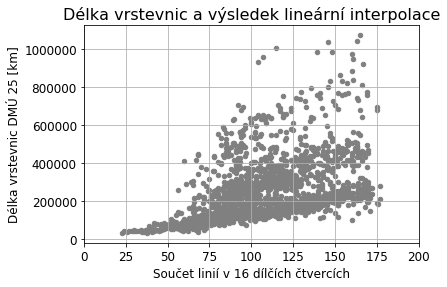

In [32]:
# graf závislosti délky dibavod před a po výběru
a = hypso
#a['vrstevnice_delka'] = a['vrstevnice_delka'].apply(lambda x: x/1000)
ax = a.plot(x='sum16', y='vrstevnice_delka', kind='scatter',
            color='grey',
            #ylim={0, 490}, 
            xlim={0,200}, 
            grid=True)

ax.set_ylabel('Délka vrstevnic DMÚ 25 [km]')
ax.set_xlabel('Součet linií v 16 dílčích čtvercích')
ax.set_title("Délka vrstevnic a výsledek lineární interpolace")

Text(0.5,1,u'Vrstevnice DM\xda 25')

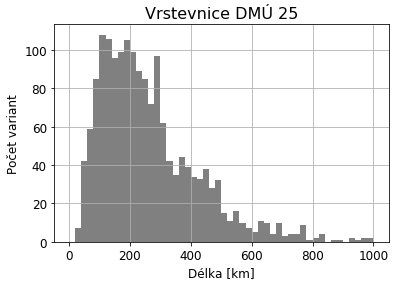

In [33]:
# histogram délky originál vrstevnic
d = hypso.vrstevnice_delka
plt.figure()

dx = (d/1000).hist(bins=50, range=[0, 1000], 
            facecolor='grey', align='mid')
dx.set_xlabel('Délka [km]')
dx.set_ylabel('Počet variant')
dx.set_title("Vrstevnice DMÚ 25")

Text(0.5,1,u'V\xfdsledek line\xe1rn\xed interpolace')

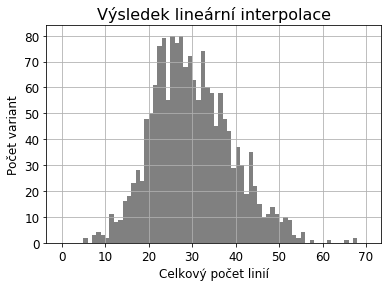

In [34]:
# histogram počtu vrstevnic po lineární interpolaci
d = hypso.pocet_hypso_vrstevnic
plt.figure()

dx = d.hist(bins=70, range=[0, 70], 
            facecolor='grey', align='mid')
dx.set_xlabel('Celkový počet linií')
dx.set_ylabel('Počet variant')
dx.set_title("Výsledek lineární interpolace")

Text(0.5,1,u'D\xe9lka \u017eeleznice')

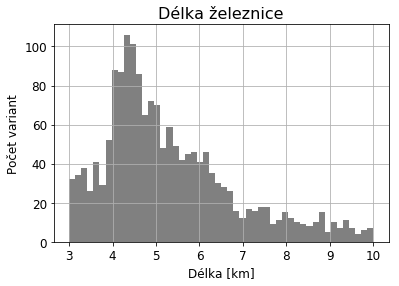

In [35]:
# histogram délky originál vrstevnic
d = gen.zeleznice_delka
plt.figure()

dx = (d/1000).hist(bins=50, range=[3, 10], 
            facecolor='grey', align='mid')
dx.set_xlabel('Délka [km]')
dx.set_ylabel('Počet variant')
dx.set_title("Délka železnice")

Text(0.5,1,u'D\xe9lka silnic')

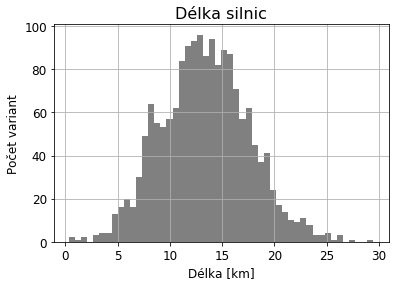

In [36]:
# histogram délky originál vrstevnic
d = gen.silnice_delka
plt.figure()

dx = (d/1000).hist(bins=50, #range=[3, 10], 
            facecolor='grey', align='mid')
dx.set_xlabel('Délka [km]')
dx.set_ylabel('Počet variant')
dx.set_title("Délka silnic")

In [37]:
gen.head()

,zeleznice_delka,vodni_plohy_rozloha,vodni_nadrz_rozloha,silnice_delka,dalnice_delka,zastavba_rozloha,zastavba_povrch_rozloha
ID,,,,,,,
46,9420.07,70898.06,15691.15,3718.49,0.0,623982.39,0.0
58,4298.16,228440.24,228440.24,10871.99,0.0,426467.58,0.0
92,5978.21,107000.92,315.71,3822.84,0.0,218191.39,0.0
96,4186.07,242562.12,178661.68,15454.99,0.0,1345205.44,0.0
104,5089.88,342418.00,176302.07,12431.33,0.0,777753.06,0.0


Text(0.5,1,u'Rozloha vodn\xedch ploch')

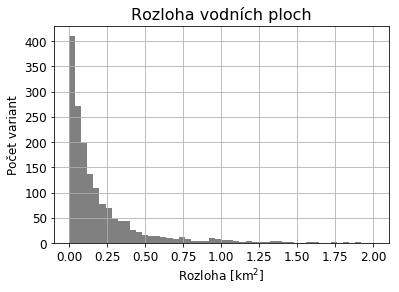

In [38]:
# histogram plocha zástavby
d = gen.vodni_plohy_rozloha
plt.figure()

dx = (d/1000/1000).hist(bins=50, range=[0, 2], 
            facecolor='grey', align='mid')
dx.set_xlabel('Rozloha [km$^2$]')
dx.set_ylabel('Počet variant')
dx.set_title("Rozloha vodních ploch")

In [39]:
gen[gen.zastavba_povrch_rozloha > 62500].describe()

,zeleznice_delka,vodni_plohy_rozloha,vodni_nadrz_rozloha,silnice_delka,dalnice_delka,zastavba_rozloha,zastavba_povrch_rozloha
count,17.000000,1.700000e+01,17.00000,17.000000,17.000000,1.700000e+01,1.700000e+01
mean,5246.256471,1.991299e+05,82485.62000,18402.649412,256.554706,1.234725e+06,2.314843e+05
std,1318.191242,2.513079e+05,145704.58325,4759.155570,1031.208587,5.033195e+05,2.480790e+05
min,3206.530000,3.901240e+03,3901.24000,11008.220000,0.000000,5.496505e+05,8.790149e+04
25%,4279.660000,6.017526e+04,13909.09000,15726.760000,0.000000,7.342640e+05,1.456091e+05
50%,5384.970000,1.180778e+05,23140.62000,17283.750000,0.000000,1.242820e+06,1.456091e+05
75%,5683.340000,2.092179e+05,62672.67000,20632.140000,0.000000,1.627659e+06,2.226670e+05
max,7982.060000,1.003203e+06,563196.52000,29488.800000,4257.030000,1.998267e+06,1.144796e+06


## export do excelu

In [40]:
writer = pd.ExcelWriter(r"C:\fenclova\diplomka\analyza\vysledky\data_fenclova.xlsx")
hypso.to_excel(writer,'Hypsometrie')
povodi.to_excel(writer,'Povodi')
gen.to_excel(writer,'Generalizace')
writer.save()